In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Prerna\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Ass-1_Linear-Regression1_boston_housing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.size

7084

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != 'MEDV']
Y = df.iloc[:, df.columns == 'MEDV']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [9]:
from sklearn import preprocessing
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [10]:
#the size of the hidden layers is selectedbased on the input features 
#and the problem's complexity. Starting with powers of 2 (e.g., 128, 64) : for 128 and 64 neurons

# using ReLU in the hidden layers helps the network learn non-linear 
#relationships in the data more effectively, 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128,input_shape=(13,),activation="relu",name="Layer1"))
model.add(Dense(64,activation="relu",name="Layer2"))
model.add(Dense(1,activation="linear",name="OutputLayer"))

model.compile(optimizer="adam",loss="mse",metrics=["mae"])


In [11]:
model.summary()
#Param #: 1792 parameters — 
#Calculated as (input features * layer neurons) + layer biases, i.e., (13 * 128) + 128.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 128)               1792      
                                                                 
 Layer2 (Dense)              (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.05,validation_data=(x_train,y_train),verbose=1)
# epochs=100: The training will run for 100 epochs (iterations over the entire training data).
# validation_split=0.05: 5% of the training data will be set aside for validation during training.
# verbose=1: The training process will print updates for each epoch, such as the loss and metric values, so you can see how the model is doing as it trains.

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 581.3164 - mae: 22.2615 - val_loss: 560.5203 - val_mae: 21.7947
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 542.7891 - mae: 21.3821 - val_loss: 514.2143 - val_mae: 20.7109
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 488.5701 - mae: 20.0619 - val_loss: 446.4143 - val_mae: 19.0133
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 410.2756 - mae: 18.0271 - val_loss: 354.0435 - val_mae: 16.4402
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 309.2207 - mae: 15.0107 - val_loss: 243.1022 - val_mae: 12.8241
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 197.9627 - mae: 11.0747 - val_loss: 141.8556 - val_mae: 8.7891
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 114.1192 - mae: 7.5689 - val_loss: 87.9842 - val_mae: 6.4775
Epoch 8/100
12/12 [=========================

12/12 [==============================] - 0s 8ms/step - loss: 55.2789 - mae: 5.4379 - val_loss: 55.1456 - val_mae: 5.3216
Epoch 63/100
12/12 [==============================] - 0s 7ms/step - loss: 55.2040 - mae: 5.3383 - val_loss: 55.0939 - val_mae: 5.2613
Epoch 64/100
12/12 [==============================] - 0s 7ms/step - loss: 55.6530 - mae: 5.2001 - val_loss: 55.2488 - val_mae: 5.1805
Epoch 65/100
12/12 [==============================] - 0s 8ms/step - loss: 54.9743 - mae: 5.2351 - val_loss: 54.9503 - val_mae: 5.4244
Epoch 66/100
12/12 [==============================] - 0s 6ms/step - loss: 57.1098 - mae: 5.7649 - val_loss: 56.1747 - val_mae: 5.6992
Epoch 67/100
12/12 [==============================] - 0s 7ms/step - loss: 54.7530 - mae: 5.3484 - val_loss: 55.5210 - val_mae: 5.0826
Epoch 68/100
12/12 [==============================] - 0s 8ms/step - loss: 55.5698 - mae: 5.0692 - val_loss: 54.9949 - val_mae: 5.1231
Epoch 69/100
12/12 [==============================] - 0s 6ms/step - loss: 5

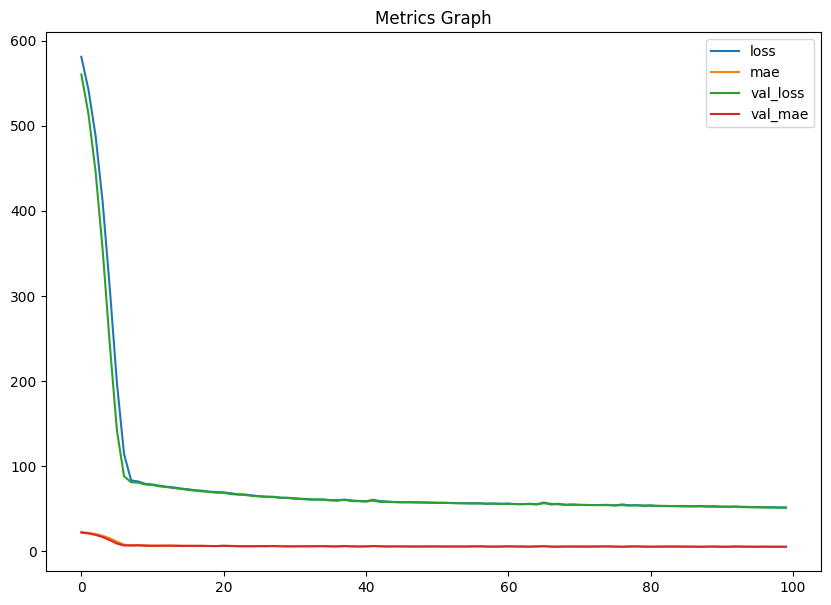

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()
#line graph : allows you to visualize how the model's performance changes over time during training, making it easier to assess the model's learning progress and whether it is overfitting or underfitting.

In [14]:
y_predict = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


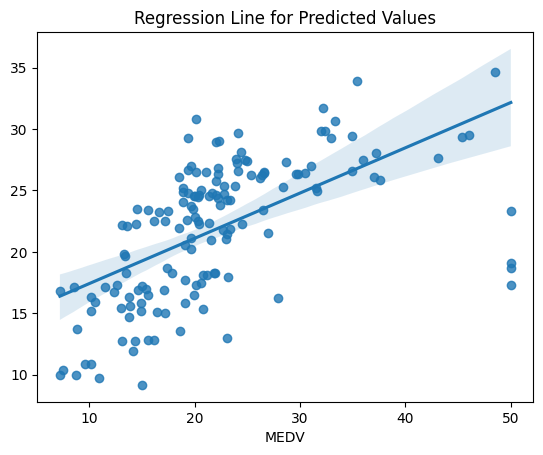

In [15]:
sns.regplot(x=y_test,y=y_predict)
plt.title("Regression Line for Predicted Values")
plt.show()

In [16]:
mse_nn, mae_nn = model.evaluate(x_test,y_test)
print("Mean squared error : ",mse_nn)
print("Mean absolute error : ",mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 52.3333 - mae: 4.9211
Mean squared error :  52.333309173583984
Mean absolute error :  4.921102523803711
